# Practical example: Backpropagation

Regression and classification problems are carried out with artificial neural networks (ANN), which
are systems that receive a matrix of input data (such as the supervised learning algorithms
already seen) and generate an output vector that attempts to resemble the actual output vector
available in supervised learning.

In this example, we are going to develop a neural network without using third-party libraries to
understand the process of a neural network and implement it from scratch without the help of
predefined functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the activation functions that can be used, which in this case are “sigmoid” and “tanh”.



In [2]:
#Activation Functions

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - x**2

Define the neural network class, where the fundamental methods of a neural network are defined,
which are:
- Its initialization.

In [10]:
# Define NN Class

class NN:

    #initialize network parameters
    #1. Activation Functions
    #2. Initialize weights and errors
    #3. Initialize with random values

    def __init__(self, layers, activation='tanh'):
        if activation =='sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivative

        #initialize weights
        self.weights = []
        self.deltas = []

        #layer definition
        #layers = [2,3,2]
        #range of weights varies between (-1,1)

        #assign random values to input layer and hidden layer
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1]+1, layers[i] + 1)) -1
            self.weights.append(r)
        #assign random values to output layer
        r = 2*np.random.random( (layers[i] +1, layers[i+1])) - 1
        self.weights.append(r)

    ##====TRAINING METHOD
    def fit(self, X, y, learning_rate = 0.2, epochs = 100000):
            #add column of ones to inputs
            #with this, add Bias unit to input layer

            ones = np.atleast_2d(np.ones(X.shape[0]))
            X = np.concatenate((ones.T, X), axis=1)

            for k in range(epochs):
                i = np.random.randint(X.shape[0])
                a = [X[i]]

                for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
                #calculate the difference in output layer and value obtained
                error = y[i] - a[-1]
                deltas = [error*self.activation_prime(a[-1])]

                #start from second layer to last one
                #one layer before the output layer
                for l in range (len(a) - 2, 0, -1):
                    deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
                self.deltas.append(deltas)

                #invert
                # [level3(output)-> level2(hidden)] => [level2(hidden)->level3(output)]
                deltas.reverse()

                #backpropagation
                #1. multiply the output delta with the input activations to get the weight gradient
                #2. update the weight by subtracting a percentage of the gradient
                for i in range(len(self.weights)):
                    layer = np.atleast_2d(a[i])
                    delta = np.atleast_2d(deltas[i])
                    self.weights[i] += learning_rate * layer.T.dot(delta)

                if k % 10000 == 0: print('epochs:', k)

    #====PREDICTION METHOD
    def predict(self, x):
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
# We have also defined two functions that can print the weights and errors of our network.
    def print_weights(self):
      print("LIST OF CONNECTION WEIGHTS")
      for i in range(len(self.weights)):
          print(self.weights[i])

    def get_deltas(self):
        return self.deltas

Once the neural network is defined, we are going to apply it in a very simple way. First, we must
define the structure of the neural network, which in this case means we are going to have an input
layer made up of two neurons, a hidden layer made up of three neurons and an output layer made
up of two neurons, with an activation signal “tanh”.

In [11]:
# Create a NN using the class we defined before
#================================= input layer 2 neurons, hidden layer 3 neurons, output layer 2 neurons, tanh activation

nn = NN([2,3,2],activation='tanh')

To understand the example and make it more real, consider that the input data are values that
indicate the environment in which a robot is following a path, which may encounter obstacles on
both sides or deviate to both sides and therefore, depending on these inputs, it must make output
decisions.

In [12]:
#input data for training
X = np.array([[0, 0],   #unobstructed
              [0, 1],   #unobstructed
              [0, -1],  #unobstructed
              [0.5,1],  #obstacle detected on right
              [0.5,-1], #obstacle on left
              [1,1],    #too close to right
              [1,-1]])  #too close to the left

# Output data to train nn
y = np.array([[0,1],    #go forward
              [0,1],    #go forward
              [0,1],    #go forward
              [-1,1],   #turn left
              [1,1],    #turn right
              [0,-1],   #go backward
              [0,-1]])  #go backward

Once the input and output values that will be used for the training of the neural network have been
defined, proceed to said training, which will define, by means of trial and error and based on our
knowledge, the most suitable number of iterations and “learning rate”.

In [13]:

# TRAIN THE NEURAL NETWORK
nn.fit(X, y, learning_rate=0.03, epochs=15001)

epochs: 0
epochs: 10000


Lastly, show the predictions obtained for input values and how the error decreases with the
number of iterations.

In [14]:
#show predictions obtained for input values and how error decreases w number of iterations
index = 0
for e in X:
    print("X:",e,"y:",y[index],"Network:",nn.predict(e))
    index = index+1

X: [0. 0.] y: [0 1] Network: [-0.00222115  0.99998631]
X: [0. 1.] y: [0 1] Network: [-0.00119324  0.99987334]
X: [ 0. -1.] y: [0 1] Network: [0.00588985 0.99998406]
X: [0.5 1. ] y: [-1  1] Network: [-0.96205556  0.96203076]
X: [ 0.5 -1. ] y: [1 1] Network: [0.93524392 0.95236113]
X: [1. 1.] y: [ 0 -1] Network: [-0.00228996 -0.97829603]
X: [ 1. -1.] y: [ 0 -1] Network: [ 0.00218581 -0.96566079]


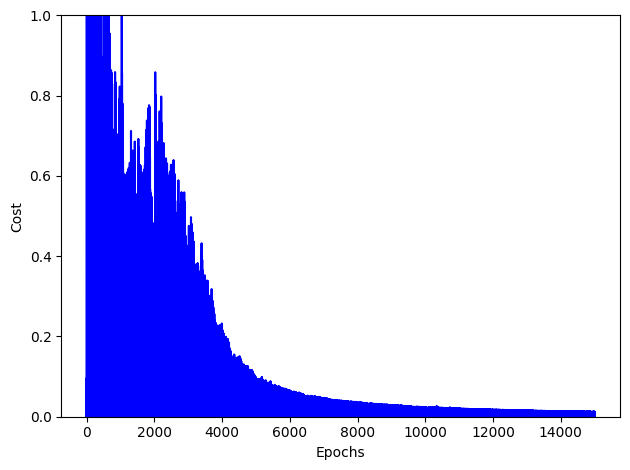

In [15]:
# Here we can see how the cost of the function is reduced and tends to zero:

deltas = nn.get_deltas()
values = []
index = 0
for fix in deltas:
    values.append(fix[1][0] + fix[1][1])
    index=index+1

plt.plot(range(len(values)),values, color='b')
plt.ylim([0,1])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()
































